# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [3]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [4]:
#filename="../Lab.7/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv("SUSY-small.csv", dtype='float64', names=VarNames)

df.head()

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


In [5]:
df.shape

(500000, 19)

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

In [7]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [10]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [12]:
N_Train=400000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [14]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

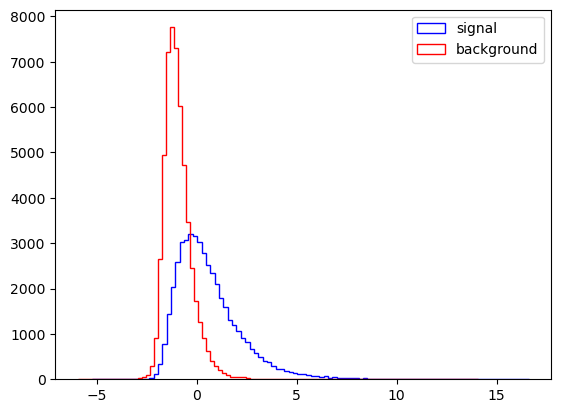

In [16]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

In [18]:
from sklearn.metrics import roc_curve, auc

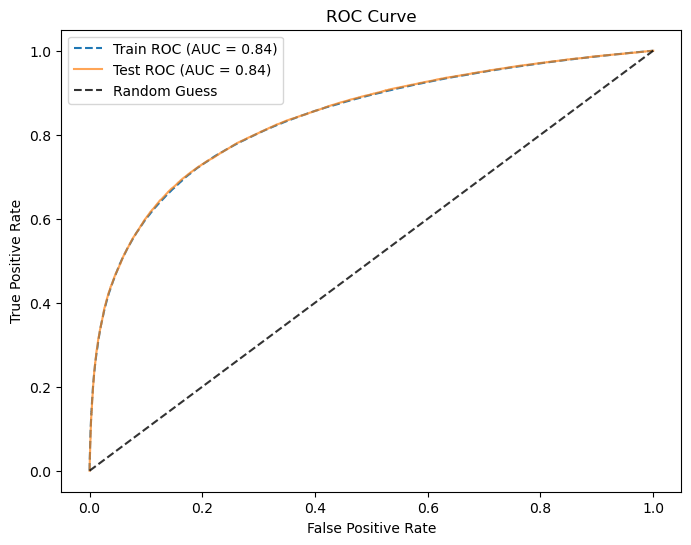

In [19]:
y_train_probs = Fisher.predict_proba(X_Train)[:, 1]
y_test_probs = Fisher.predict_proba(X_Test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_Train, y_train_probs)
auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_Test, y_test_probs)
auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {auc_train:.2f})', linestyle='--')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {auc_test:.2f})', linestyle='-',alpha=0.7)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess',alpha = 0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

    Both the ROC curves and AUC values are very similar across the train and test sets. Because of the relatively high AUC value, we can confidently say that the LDA is able to generalize well and distinguish between classes.

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

In [22]:
VarNames

['signal',
 'l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi',
 'MET_rel',
 'axial_MET',
 'M_R',
 'M_TR_2',
 'R',
 'MT2',
 'S_R',
 'M_Delta_R',
 'dPhi_r_b',
 'cos_theta_r1']

In [23]:
RawNames = ['signal','l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

FeatureNames = ['signal', 'MET_rel',
 'axial_MET',
 'M_R',
 'M_TR_2',
 'R',
 'MT2',
 'S_R',
 'M_Delta_R',
 'dPhi_r_b',
 'cos_theta_r1']

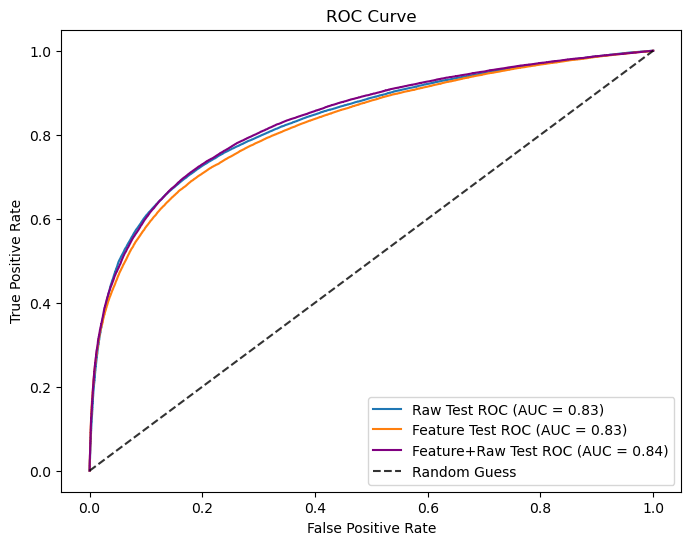

In [24]:
#Train_Sample_Raw = Train_Sample[RawNames]

X_Train=Train_Sample[RawNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[RawNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]

Fisher.fit(X_Train,y_Train)


y_train_probs = Fisher.predict_proba(X_Train)[:, 1]
y_test_probs = Fisher.predict_proba(X_Test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_Train, y_train_probs)
auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_Test, y_test_probs)
auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
#plt.plot(fpr_train, tpr_train, label=f'Raw Train ROC (AUC = {auc_train:.2f})', linestyle='--')
plt.plot(fpr_test, tpr_test, label=f'Raw Test ROC (AUC = {auc_test:.2f})', linestyle='-')



X_Train=Train_Sample[FeatureNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[FeatureNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]

Fisher.fit(X_Train,y_Train)


y_train_probs = Fisher.predict_proba(X_Train)[:, 1]
y_test_probs = Fisher.predict_proba(X_Test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_Train, y_train_probs)
auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_Test, y_test_probs)
auc_test = auc(fpr_test, tpr_test)

#plt.plot(fpr_train, tpr_train, label=f'Feature Train ROC (AUC = {auc_train:.2f})', linestyle='--')
plt.plot(fpr_test, tpr_test, label=f'Feature Test ROC (AUC = {auc_test:.2f})', linestyle='-')



X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]

Fisher.fit(X_Train,y_Train)


y_train_probs = Fisher.predict_proba(X_Train)[:, 1]
y_test_probs = Fisher.predict_proba(X_Test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_Train, y_train_probs)
auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_Test, y_test_probs)
auc_test = auc(fpr_test, tpr_test)

#plt.plot(fpr_train, tpr_train, label=f'Feature Train ROC (AUC = {auc_train:.2f})', linestyle='--')
plt.plot(fpr_test, tpr_test, label=f'Feature+Raw Test ROC (AUC = {auc_test:.2f})', color="purple",linestyle='-')



plt.plot([0, 1], [0, 1], 'k--', label='Random Guess',alpha = 0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.




In [26]:
Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]

In [27]:
import sklearn.neighbors as NA

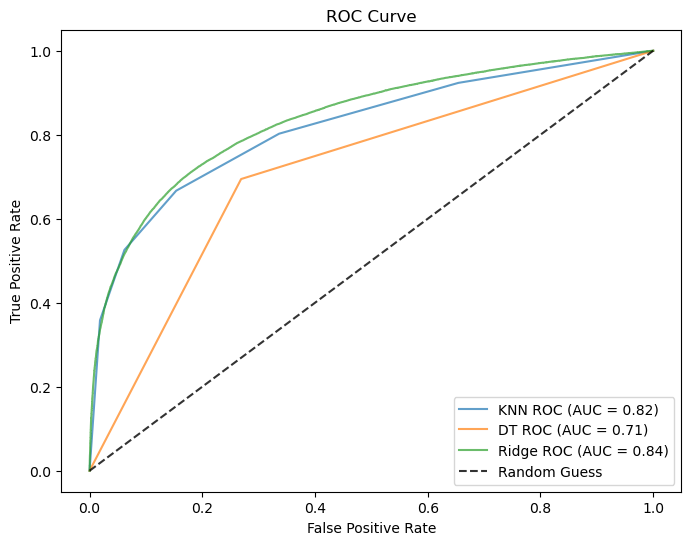

In [28]:
knn=NA.KNeighborsClassifier()
knn.fit(X_Train,y_Train)

y_test_probs = knn.predict_proba(X_Test)[:, 1]

fpr_test, tpr_test, _ = roc_curve(y_Test, y_test_probs)
auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'KNN ROC (AUC = {auc_test:.2f})', linestyle='-',alpha=0.7)



import sklearn.tree

dt=sklearn.tree.DecisionTreeClassifier()
dt.fit(X_Train,y_Train)

y_test_probs = dt.predict_proba(X_Test)[:, 1]

fpr_test, tpr_test, _ = roc_curve(y_Test, y_test_probs)
auc_test = auc(fpr_test, tpr_test)

plt.plot(fpr_test, tpr_test, label=f'DT ROC (AUC = {auc_test:.2f})', linestyle='-',alpha=0.7)



import sklearn.linear_model

ridge=sklearn.linear_model.RidgeClassifier()
ridge.fit(X_Train,y_Train)

#y_test_probs = ridge.predict_proba(X_Test)[:, 1]
y_test_scores = ridge.decision_function(X_Test)

fpr_test, tpr_test, _ = roc_curve(y_Test, y_test_scores)
                                  #y_test_probs)
auc_test = auc(fpr_test, tpr_test)

plt.plot(fpr_test, tpr_test, label=f'Ridge ROC (AUC = {auc_test:.2f})', linestyle='-',alpha=0.7)



plt.plot([0, 1], [0, 1], 'k--', label='Random Guess',alpha = 0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

In [30]:
def model_comparison(models, X_train, X_test, y_train, y_test):
    
    for model in models:
        model.fit(X_train, y_train)
        
        if hasattr(model, "predict_proba"):
            probs = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            probs = model.decision_function(X_test)
        
        fpr, tpr, _ = roc_curve(y_test, probs)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})', alpha=0.7)

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', alpha=0.8)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend()
    plt.tight_layout()
    plt.show()

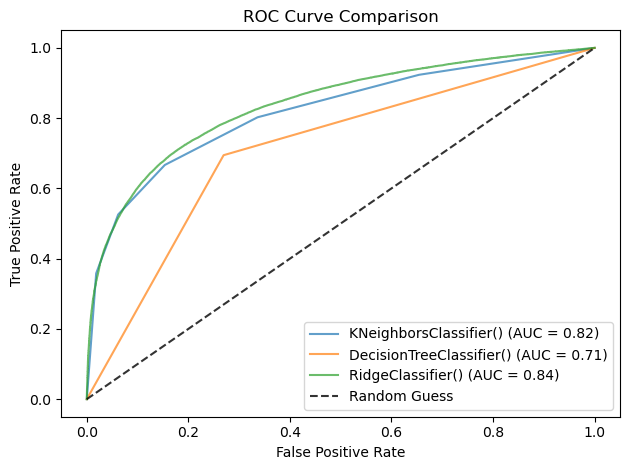

In [31]:
model_comparison([knn,dt,ridge], X_Train, X_Test, y_Train, y_Test)

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 7.

In [33]:
scenarios = [(10, 100), (100, 1000), (1000, 10000), (10000, 100000)]

max_significances = []

for s_count, b_count in scenarios:
    df_sig_sample = df[df['signal'] == 1].sample(n=s_count, random_state=42)
    df_bkg_sample = df[df['signal'] == 0].sample(n=b_count, random_state=42)

    df_sample = pd.concat([df_sig_sample, df_bkg_sample])
    
    X = df_sample[RawNames]
    y = df_sample['signal']
    
    ridge = sklearn.linear_model.RidgeClassifier()
    ridge.fit(X, y)
    
    y_hat = ridge.predict(X)

    S_pred = np.sum((y_hat == 1) & (y == 1)) 
    B_pred = np.sum((y_hat == 1) & (y == 0)) 


    if S_pred + B_pred > 0:
        significance = S_pred / np.sqrt(S_pred + B_pred)
    else:
        significance = 0

    max_significances.append(significance)
    print(f"Scenario S={s_count}, B={b_count} -> Significance: {significance:.3f}")

Scenario S=10, B=100 -> Significance: 3.162
Scenario S=100, B=1000 -> Significance: 10.000
Scenario S=1000, B=10000 -> Significance: 31.623
Scenario S=10000, B=100000 -> Significance: 100.000


### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

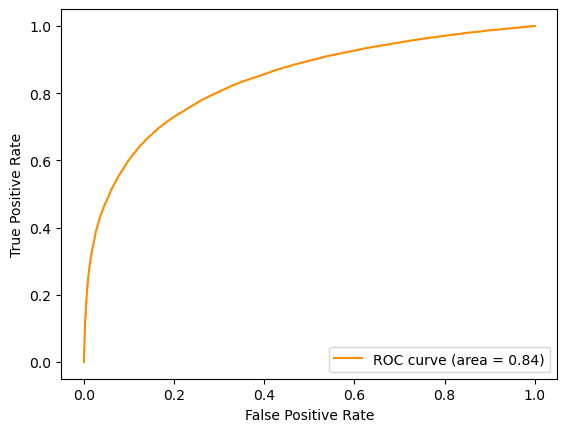

In [35]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


In [64]:
from sklearn.metrics import (roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix)
from sklearn.datasets import make_classification

scenarios = [(10, 100), (100, 1000), (1000, 10000), (10000, 100000)]

results = []

for ind,(signal, background) in enumerate(scenarios):
    X_sig, y_sig = make_classification(n_samples=signal, n_features=20, n_informative=5, 
                                       n_redundant=0, n_clusters_per_class=1, weights=[0], flip_y=0, random_state=42)
    X_bkg, y_bkg = make_classification(n_samples=background, n_features=20, n_informative=5, 
                                       n_redundant=0, n_clusters_per_class=1, weights=[1], flip_y=0, random_state=43)
    
    model = sklearn.linear_model.RidgeClassifier()
    model.fit(X_Train, y_Train)

    y_scores = model.decision_function(X_Test)
    y_hat = model.predict(X_Test)

    fpr, tpr, thresholds = roc_curve(y_Test, y_scores)
    roc_auc = auc(fpr, tpr)

    cm = confusion_matrix(y_Test, y_hat)
    tn, fp, fn, tp = cm.ravel()

    TPR = tp / (tp + fn) if (tp + fn) > 0 else 0
    FPR = fp / (fp + tn) if (fp + tn) > 0 else 0

    precision = precision_score(y_Test, y_hat, zero_division=0)
    recall = recall_score(y_Test, y_hat, zero_division=0)
    f1 = f1_score(y_Test, y_hat, zero_division=0)
    accuracy = accuracy_score(y_Test, y_hat)

    S = sum((y_Test == 1) & (y_hat == 1)) 
    B = sum((y_Test == 0) & (y_hat == 1)) 
    significance = S / np.sqrt(S + B) if S + B > 0 else 0

    results.append({
        'S': signal,
        'B': background,
        'TPR': round(TPR, 3),
        'FPR': round(FPR, 3),
        'AUC': round(roc_auc, 3),
        'Precision': round(precision, 3),
        'Recall': round(recall, 3),
        'F1': round(f1, 3),
        'Accuracy': round(accuracy, 3),
        'Max Significance': round(max_significances[ind], 3)
    })

df = pd.DataFrame(results)
df

,S,B,TPR,FPR,AUC,Precision,Recall,F1,Accuracy,Max Significance
0,10,100,0.577,0.088,0.838,0.848,0.577,0.687,0.758,3.162
1,100,1000,0.577,0.088,0.838,0.848,0.577,0.687,0.758,10.000
2,1000,10000,0.577,0.088,0.838,0.848,0.577,0.687,0.758,31.623
3,10000,100000,0.577,0.088,0.838,0.848,0.577,0.687,0.758,100.000
